In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the House Prices dataset (contains missing values)
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

In [3]:
# Display first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.49990

In [6]:
# Measure of Central Tendency
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode().iloc[0]

print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)


Mean Values:
 longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

Median Values:
 longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

Mode Values:
 longitude               -118.31
latitude                  34.06
housing_median_age         52.0
total_rooms              1527.0
total_bedrooms            280.0
population                891.0
households                306.0
median_income             3.125
median_house_value     500001.0
ocean

In [7]:
# Measure of Variability
variance = df.var(numeric_only=True)
std_dev = df.std(numeric_only=True)
iqr = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)

print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)
print("\nInterquartile Range (IQR):\n", iqr)


Variance:
 longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median_house_value    1.331615e+10
dtype: float64

Standard Deviation:
 longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

Interquartile Range (IQR):
 longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income          

In [8]:
# Handling Missing Values (Replacing missing values in 'total_bedrooms' with Median)
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

<ipython-input-8-f780335268cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


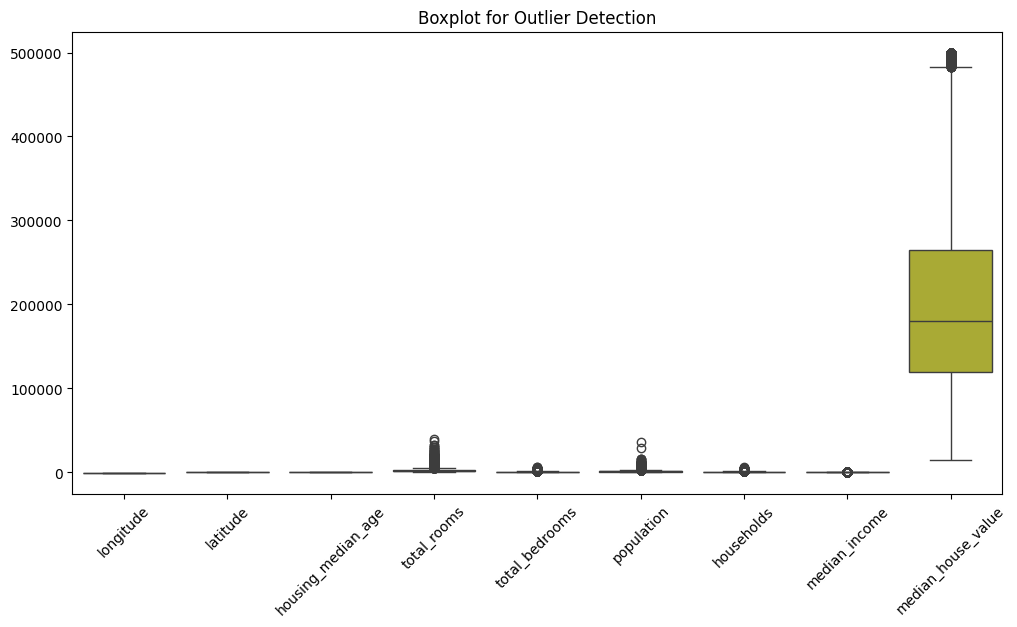

In [9]:
# Boxplot for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()